In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame([[5,7], [12,6], [3,3]],
                   index = ['ensino_fundamental', 'ensino_medio', 'ensino_superior'],
                   columns = ['casado', 'solteiro'])
data

,casado,solteiro
ensino_fundamental,5,7
ensino_medio,12,6
ensino_superior,3,3


Temos aqui duas variáveis qualitativas, para analisar, vamos primeiro fazer alguns gráficos

In [3]:
####Gráfico de barras

<Axes: >

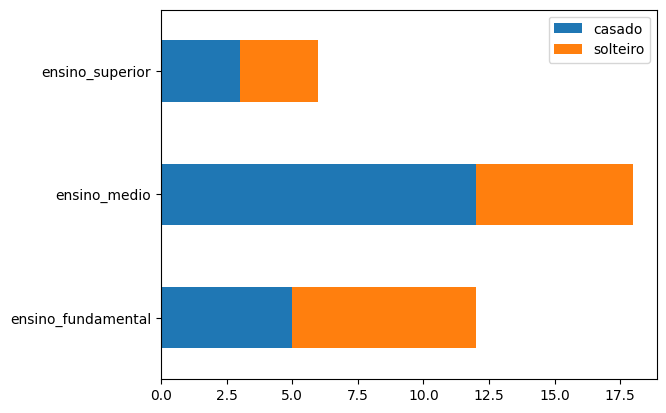

In [4]:
data.plot(kind = 'barh', stacked=True)

<Axes: >

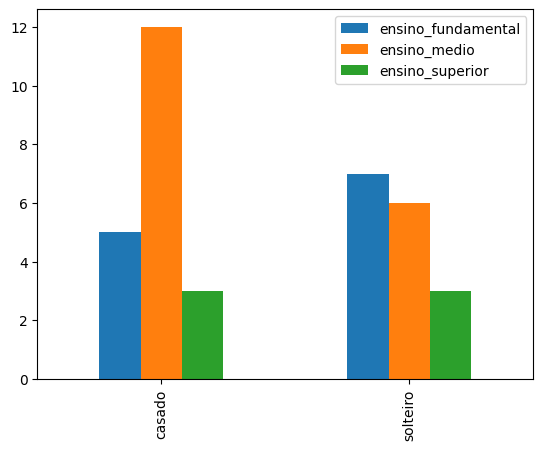

In [5]:
data.T.plot(kind = 'bar')

#### Gráfico Mosaico

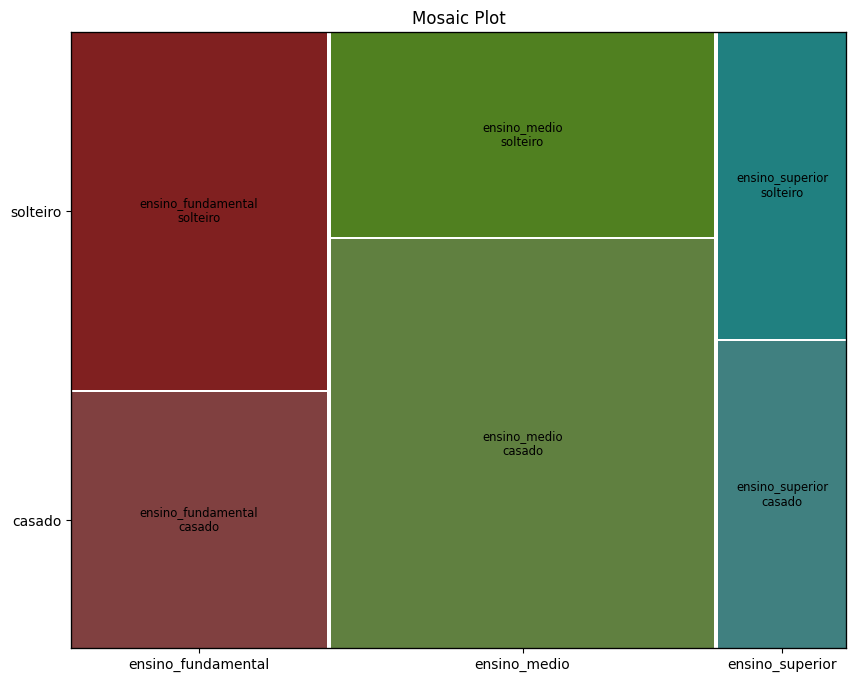

In [6]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(figsize = (10,8))
mosaic(data=data.stack(), title='Mosaic Plot', ax = ax)
plt.show()

Note que a moda é o ensino médio, por ser mais largo. Além disso, condicionado ao ensino médio, temos mais solteros do que casados.
Condicionado ao ensino médio, temos mais casados que solteiros. No caso de consi

Note que se não houvesse associação, a divisão das barras seriam proporcionais, logo temos um insight que há algum tipo de associação mesmo que ao acaso.

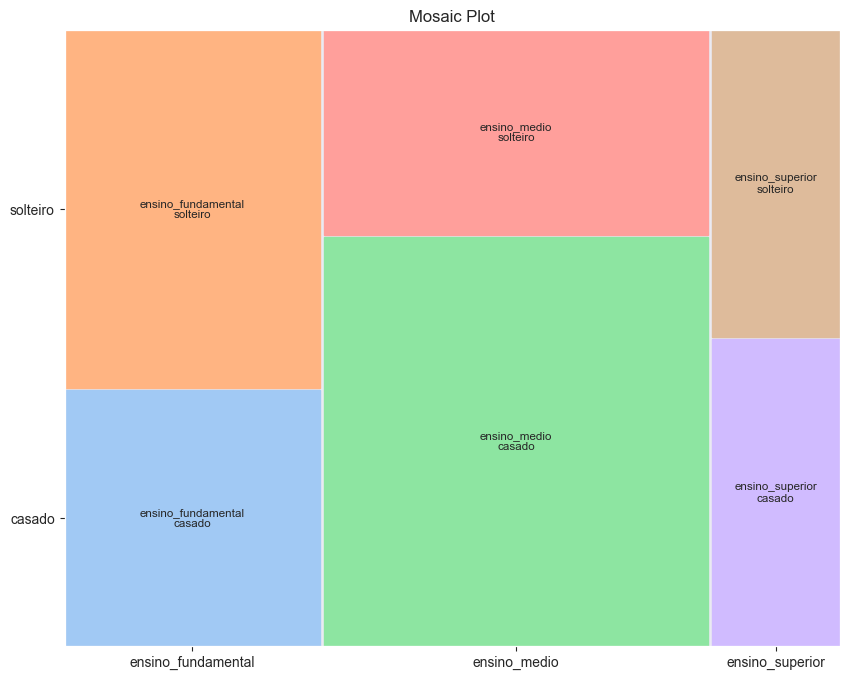

In [7]:
sns.set_style('dark')
name = [(i,j) for i in data.index for j in data.columns]
cols = {i:j for i, j in zip(name, sns.color_palette("pastel", len(name)))}
fig, ax = plt.subplots(figsize = (10,8))
mosaic(data=data.stack(), title='Mosaic Plot', ax = ax, properties = lambda key: {'color': cols[key]} )
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, ensino_fundamental to ensino_superior
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   casado    3 non-null      int64
 1   solteiro  3 non-null      int64
dtypes: int64(2)
memory usage: 180.0+ bytes


Note que fizemos apenas uma análise exploratória. Para fazer uma análise inferencial precisamos fazer uma tabela de contingência.

In [9]:
contingency_table = data.copy(deep = True)
contingency_table['total_linha'] = contingency_table.sum(axis = 'columns').ravel()
contingency_table.loc['total_coluna'] = contingency_table.sum()
contingency_table

C:\Users\Mailson\AppData\Local\Temp\ipykernel_14608\1748325362.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  contingency_table['total_linha'] = contingency_table.sum(axis = 'columns').ravel()


,casado,solteiro,total_linha
ensino_fundamental,5,7,12
ensino_medio,12,6,18
ensino_superior,3,3,6
total_coluna,20,16,36


In [133]:
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(data)

In [134]:
print(f'chi-quadrado {chi2:.2f}, pvalor {p:.2f}, graus de liberdade {dof:.2f}')

chi-quadrado 1.91, pvalor 0.38, graus de liberdade 2.00


In [173]:
crit = stats.chi2.ppf(q = 0.95, df = dof)
print(crit)

5.991464547107979


Note que o valor encontrado de chi-quadrado é menor que o valor critico para $\alpha = 0.05$, ou seja, para uma margem de erro de 5 por cento

Como o número de dados é baixo, é mais acertivo usar o teste exato de fisher. Mas nenhuma biblioteca no python tem para tabelas maiores que 2x2

Pelo R, o p valor resulta em $0.4044$ e é maior que $0.5$ estabelecido $\alpha$. Note que estamos usando uma regra (via de regra) de que se o p valor for menor que 0.05, então rejeitamos a hipotese. Caso seja maior, não rejeitamos.

In [202]:
assoc_coe = np.sqrt(chi2/(chi2+data.values.sum()))
assoc_coe

0.22459987501681022

In [201]:
tschuprow = np.sqrt(chi2/(data.values.sum()*np.sqrt(dof)))
tschuprow

0.19381704711024608

In [162]:
stats.contingency.association(data,method='pearson')

0.22459987501681022

In [164]:
stats.contingency.association(data,method='tschuprow')

0.19381704711024608

Para fazer esse teste hipotese com dados qualitativos precisariamos criar categorias, como salario baixo, salario medio, salario alto, e avaliar.

<bound method DataFrame.sum of                     casado  solteiro
ensino_fundamental       5         7
ensino_medio            12         6
ensino_superior          3         3>

36